### import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [4]:
!pip install torch

In [6]:
!pip install torchvision

### import dataset

In [11]:
dataset = ImageFolder('minet', transform=transforms.ToTensor())

In [32]:
len(dataset)

956

In [33]:
dataset.classes

['biotite',
 'bornite',
 'chrysocolla',
 'malachite',
 'muscovite',
 'pyrite',
 'quartz']

In [16]:
dataset[1]

(tensor([[[0.4000, 0.3882, 0.3765,  ..., 1.0000, 1.0000, 1.0000],
          [0.4157, 0.3882, 0.3608,  ..., 1.0000, 1.0000, 1.0000],
          [0.4196, 0.3843, 0.3373,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.4039, 0.3922, 0.3804,  ..., 1.0000, 1.0000, 1.0000],
          [0.4196, 0.3922, 0.3647,  ..., 1.0000, 1.0000, 1.0000],
          [0.4235, 0.3882, 0.3412,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[0.4196, 0.4078, 0.3961,  ..., 1.0000, 1.0000, 1.0000],
          [0.4353, 0.4078, 0.3804,  ..., 1.0000, 1.0000, 1.0000],
          [0.4392, 0.4039, 0.3569,  ...,

### We can clearly see that dataset has two column one contain the metrix of the image and other containt the its group which is target column

### label assign for each group are

In [18]:
target_label = ['biotite', 'bornite', 'chrysocolla', 'malachite', 
                'muscovite', 'pyrite', 'quartz']
## The classes are arranged in alphabatical order i.e 0 for 'biotite', 1 for 'bornite' and so on 

In [22]:
type(np.array(dataset[1][0]))

numpy.ndarray

In [25]:
np.shape(np.array(dataset[1][0]))

(3, 292, 425)

In [30]:
np.array(dataset[1][0]).ndim

3

### Print first 20 image of dataset

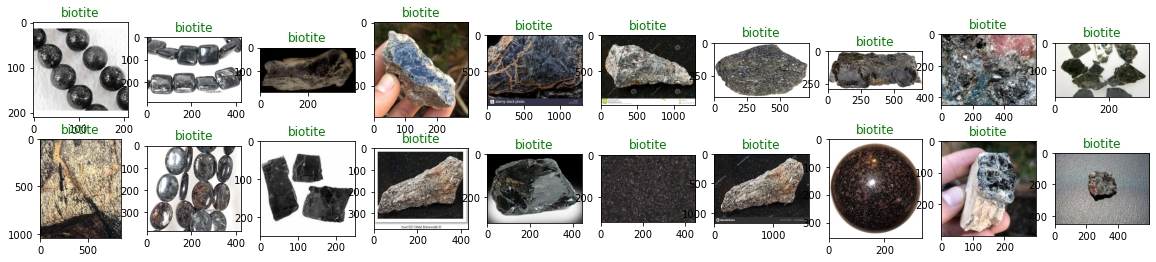

In [36]:
plt.figure(figsize=(20, 4))

for i in range(20):
    image, label = dataset[i]
    plt.subplot(2,10,i+1)
    plt.imshow(image.permute(1,2,0)) ## since the image is 3 dimensional so converted it in 2 dimensional
    plt.title(target_label[label], color='green')

### Similarly we can print random image from the dataset

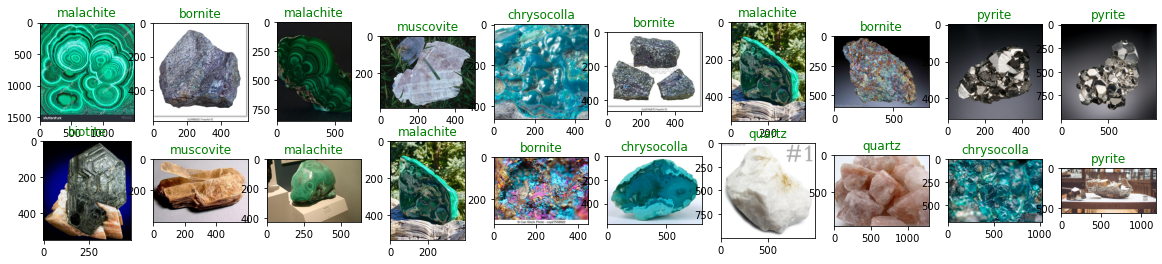

In [38]:
plt.figure(figsize=(20, 4))

for i in range(20):
    j = np.random.randint(0, 956)
    image, label = dataset[j]
    plt.subplot(2,10,i+1)
    plt.imshow(image.permute(1,2,0)) ## since the image is 3 dimensional so converted it in 2 dimensional
    plt.title(target_label[label], color='green')

### So we can see the different Minerals

## Now I am going to check the number of different images available for each label

In [39]:
count = {}

for i in range(len(dataset)):
    image, label = dataset[i]
    label = target_label[label]
    if label not in count:
        count[label] = 1
    elif label in count:
        count[label] += 1

In [48]:
count_df = pd.DataFrame(count,index=np.arange(1))

In [49]:
count_df

,biotite,bornite,chrysocolla,malachite,muscovite,pyrite,quartz
0,68,170,163,235,77,98,145


In [51]:
count_df = count_df.transpose().reset_index()
count_df.columns = ['Minerals', 'Number of Images']

In [52]:
count_df

,Minerals,Number of Images
0,biotite,68
1,bornite,170
2,chrysocolla,163
3,malachite,235
4,muscovite,77
5,pyrite,98
6,quartz,145


### Plot the graph to show the clear visuals

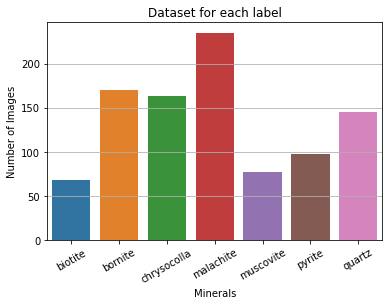

In [55]:
sns.barplot(x=count_df['Minerals'], y=count_df['Number of Images'])
plt.title('Dataset for each label');
plt.xticks(rotation=30)
plt.grid(axis='y')

### from the graph clearly see that we have huger number of sample image for malachite

## Now the next part will be in future plan where I  will focus on Model evaluation and its performance

## Also will convert this project in an application form